In [38]:
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn

# Loading Dataset and exploring

In [2]:
# Load the dataset
data = pd.read_csv('Loan_Data.csv')

# Display the first few rows of the dataset to inspect its contents
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.shape

(614, 13)

In [4]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# Handling Missing Values

In [5]:
# In percentage
round(data.isnull().mean()*100,2) 

Loan_ID              0.00
Gender               2.12
Married              0.49
Dependents           2.44
Education            0.00
Self_Employed        5.21
ApplicantIncome      0.00
CoapplicantIncome    0.00
LoanAmount           3.58
Loan_Amount_Term     2.28
Credit_History       8.14
Property_Area        0.00
Loan_Status          0.00
dtype: float64

In [6]:
# Dropping missing values
data.dropna(inplace=True)

# Encoding Dependant Variable 'Loan_Status'

In [7]:
# Import necessary library to encode the feature using Label Encoding
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])

In [8]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,1


# Exploring each Independent Variables

In [9]:
# Display all columns with categorical data types
categorical_columns = data.select_dtypes(include=['object', 'category']).columns
print("Categorical columns:", categorical_columns)


Categorical columns: Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'Property_Area'],
      dtype='object')


## 1.'Dependents'

In [10]:
#Checking the values of the column 'Dependent'
data['Dependents'].value_counts()

0     274
2      85
1      80
3+     41
Name: Dependents, dtype: int64

In [11]:
# Replacing the value'3+' to '4'
data['Dependents'] = data['Dependents'].replace('3+', '4')

## 2. 'Married'  3. 'Self_Employed '

In [12]:
data['Married'] = le.fit_transform(data['Married'])
data['Self_Employed'] = le.fit_transform(data['Self_Employed'])

## 4. 'Gender'

In [13]:
# Using One-Hot Encoding
data = pd.get_dummies(data, columns=['Gender'])


## 5.'Education' 

In [14]:
# checking value_counts
data['Education'].value_counts()


Graduate        383
Not Graduate     97
Name: Education, dtype: int64

In [15]:
# Using Binary Encoding
data['Education'] = data['Education'].map({'Graduate': 1, 'Not Graduate': 0})


## 6.'Property_Area'

In [16]:
# checking value_counts
data['Property_Area'].value_counts()


Semiurban    191
Urban        150
Rural        139
Name: Property_Area, dtype: int64

In [17]:
# One-hot encoding for the Property_Area column
data = pd.get_dummies(data, columns=['Property_Area'], prefix='Area')


## 7. 'Loan ID'

In [18]:
# Dropping the column
data = data.drop('Loan_ID', axis=1)

In [19]:
data.head()

,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Female,Gender_Male,Area_Rural,Area_Semiurban,Area_Urban
1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,0,1,1,0,0
2,1,0,1,1,3000,0.0,66.0,360.0,1.0,1,0,1,0,0,1
3,1,0,0,0,2583,2358.0,120.0,360.0,1.0,1,0,1,0,0,1
4,0,0,1,0,6000,0.0,141.0,360.0,1.0,1,0,1,0,0,1
5,1,2,1,1,5417,4196.0,267.0,360.0,1.0,1,0,1,0,0,1


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 480 entries, 1 to 613
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Married            480 non-null    int32  
 1   Dependents         480 non-null    object 
 2   Education          480 non-null    int64  
 3   Self_Employed      480 non-null    int32  
 4   ApplicantIncome    480 non-null    int64  
 5   CoapplicantIncome  480 non-null    float64
 6   LoanAmount         480 non-null    float64
 7   Loan_Amount_Term   480 non-null    float64
 8   Credit_History     480 non-null    float64
 9   Loan_Status        480 non-null    int32  
 10  Gender_Female      480 non-null    uint8  
 11  Gender_Male        480 non-null    uint8  
 12  Area_Rural         480 non-null    uint8  
 13  Area_Semiurban     480 non-null    uint8  
 14  Area_Urban         480 non-null    uint8  
dtypes: float64(4), int32(3), int64(2), object(1), uint8(5)
memory usage: 38.0+

# Data Visualization

<Axes: xlabel='Education', ylabel='count'>

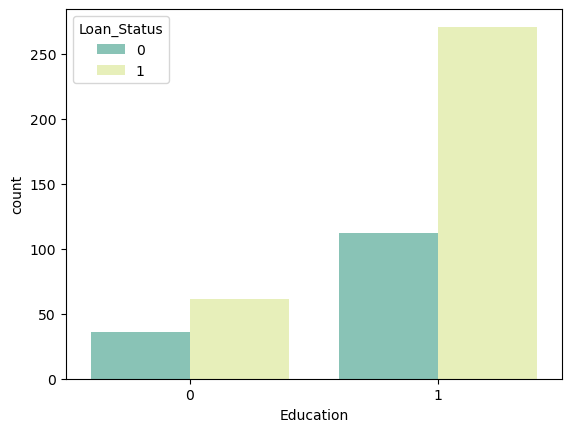

In [21]:
#Education & Loan Status
sns.countplot(x='Education', hue='Loan_Status',  palette= ["#7fcdbb","#edf8b1"],data= data)

<Axes: xlabel='Married', ylabel='count'>

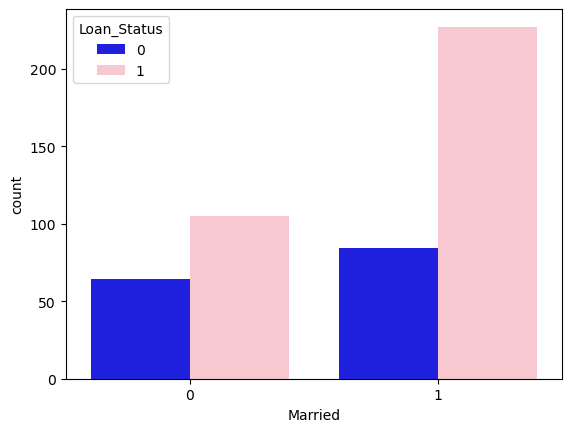

In [22]:
# Marital_ Status and Loan_Status
sns.countplot(x='Married', hue='Loan_Status',  palette= ["Blue","Pink"],data= data)

# Train-Test Split

In [23]:
from sklearn.model_selection import train_test_split

# Define your features (X) and target (y)
X = data.drop('Loan_Status', axis=1) 
y = data['Loan_Status']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)


## Training the Model

In [24]:
# Training loan eligibility model using various classification algorithms,
# including Logistic Regression,
# Decision Tree, Random Forest, Support Vector Machine (SVM), K-Nearest Neighbors (KNN)

# Import necessary Libraries:

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Train and evaluate each classifier
for name, clf in classifiers.items():
    # Train the model
    clf.fit(X_train, y_train)
    
    # Make predictions
    y_pred = clf.predict(X_test)
    
    # Calculate accuracy and confusion matrix
    accuracy = accuracy_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f'{name}:')
    print(f'Accuracy: {accuracy:.4f}')
    print('Confusion Matrix:')
    print(cm)
    print('-' * 50)


C:\Users\Owner\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression:
Accuracy: 0.7812
Confusion Matrix:
[[14 16]
 [ 5 61]]
--------------------------------------------------
Decision Tree:
Accuracy: 0.7292
Confusion Matrix:
[[19 11]
 [15 51]]
--------------------------------------------------
Random Forest:
Accuracy: 0.7917
Confusion Matrix:
[[20 10]
 [10 56]]
--------------------------------------------------
SVM:
Accuracy: 0.6875
Confusion Matrix:
[[ 0 30]
 [ 0 66]]
--------------------------------------------------
KNN:
Accuracy: 0.6146
Confusion Matrix:
[[ 6 24]
 [13 53]]
--------------------------------------------------


# Save the Trained Model

The Random Forest Classifier is selected due to its high accuracy, balanced confusion matrix, and reliable performance in predicting loan eligibility. It strikes a good balance between correctly predicting both positive and negative cases, making it the best choice for this task.

### 1. Hyperparameter Tuning

To improve the performance of your Random Forest model, you can perform hyperparameter tuning using techniques like Grid Search or Randomized Search. This allows you to find the best parameters for your model, such as the number of trees (n_estimators), maximum depth (max_depth), and others.

In [26]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 5, 'n_estimators': 100}


### 2. Model Evaluation with Cross-Validation

While accuracy is important, you may want to evaluate your model with cross-validation to ensure its robustness and generalizability. This will give you a better idea of how the model performs across different splits of the data.

In [27]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(RandomForestClassifier(**best_params), X_train, y_train, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean cross-validation score: {cv_scores.mean()}')


Cross-validation scores: [0.8961039  0.77922078 0.76623377 0.77922078 0.77631579]
Mean cross-validation score: 0.799419002050581


## Create a Machine Learning Pipeline: 

In [34]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Assuming X and y are your features and labels
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the pipeline
pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),  # Handle missing values
    ('scaler', StandardScaler()),                # Standardize the features
    ('classifier', RandomForestClassifier())     # Model
])

# Define parameter grid for Random Forest
param_grid = {
    'classifier__n_estimators': [50, 100, 200],
    'classifier__max_depth': [None, 10, 20]
}

# Apply GridSearchCV to tune hyperparameters
grid_search = GridSearchCV(pipeline, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best pipeline
best_pipeline = grid_search.best_estimator_

# Save the best pipeline model
with open('loanqualifyai.pkl', 'wb') as file:
    pickle.dump(best_pipeline, file)

# Optionally, evaluate the best model
y_pred = best_pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Optimized Model Accuracy: {accuracy:.4f}")


Optimized Model Accuracy: 0.8229


###  4. Save the Model

In [35]:
import pickle

# Save the pipeline
with open('loanqualifyai.pkl', 'wb') as file:
    pickle.dump(best_pipeline, file)


In [39]:
print("numpy",np.__version__)
print("pandas",pd.__version__)
print("sklearn",sklearn.__version__)

numpy 1.23.5
pandas 1.5.3
sklearn 1.2.1
